Text(0.5, 1.0, 'Original image')

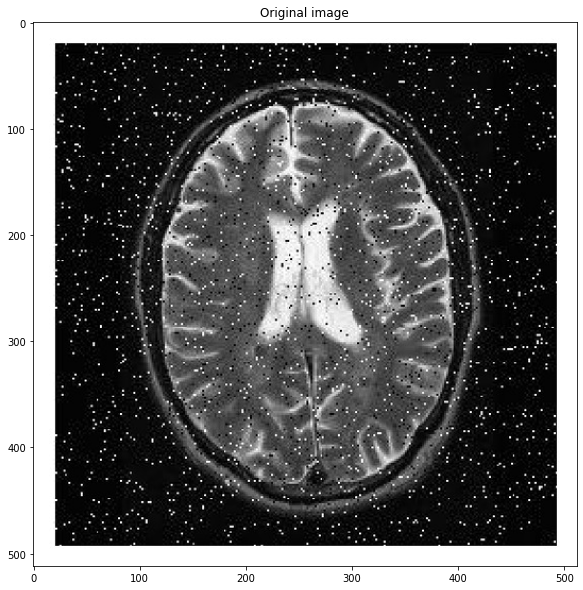

In [54]:
%matplotlib inline
from IPython.display import display, Math, Latex
import cv2
import random
import numpy as numpy
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import math
import scipy.ndimage as nd
import pylab


#url = 'https://www.researchgate.net/profile/Zhiwu-Liao/publication/44850068/figure/fig2/AS:305428874448947@1449831326678/Noisy-Lena-a-and-denoised-Lena-using-Wieners-filter-with-77-mask-b.png'
url = 'https://miro.medium.com/max/1074/1*2I9jCD3ZuQd-SUhC21ra8Q.jpeg'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')

img.thumbnail((512, 512), Image.ANTIALIAS)

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

In [55]:
def hybrid_median_filtering(im,n=5):

    img = numpy.zeros(im.shape,dtype=numpy.int16)
    
    # Derive indices for the two patterns representing X and +
    indicesC = [0,4,6,8,12,16,18,20,24]
    indicesP = [2,7,10,11,12,13,14,17,22]
    
    v = int((n-1) / 2)

	# Process the image (ignoring the outer two layers of the image boundary
    for i in range(2,im.shape[0]-2):
        for j in range(2,im.shape[1]-2):
            # Extract the neighbourhood area
            block = im[i-v:i+v+1, j-v:j+v+1]
            
            # Reshape the neighborhood into a vector by flattening the 2D block
            wB = block.flatten()
            
            # Extract pixel values using indices
            wBc = numpy.take(wB,indicesC)
            wBp = numpy.take(wB,indicesP)
                  
            # Calculate the median values      
            wBcMed = numpy.median(wBc)
            wBpMed = numpy.median(wBp)
            
            # Calculate the hybrid median of the original pixel, and the two 
            # medians extracted above
            xmed = numpy.median([wBcMed,wBpMed,im[i][j]])

            # Assign the values               
            if (xmed > 0):
                img[i][j] = int(xmed)
            else:
                img[i][j] = im[i][j]
    return img

Text(0.5, 1.0, 'After Hybrid Median Filtering')

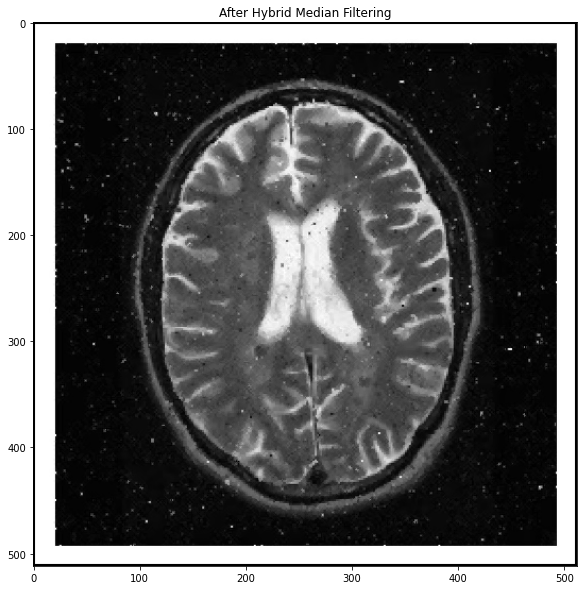

In [56]:
img = numpy.asarray(img)
enhance_img = hybrid_median_filtering(img)

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(enhance_img, cmap='gray', vmin=0, vmax=255)
plt.title("After Hybrid Median Filtering")